In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [4]:
# direction: 
# 3 cluster type of airbnb according to the different types of reviews (bad,good,best)
# find correlation between each possible variable and quality of reviews
# word cloud to determine the most common used words for diff cluster
# NLP

In [5]:
data = pd.read_csv('listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
data.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [7]:
#do NLP for "name","summary","space","description","neighbourhood overview", "notes", "transit", "host_about"

#analyse based on number: "host_listings_count","host_total_listings_count", "review_scores_rating", 
#"review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication", 
#"review_scores_location", "review_scores_value", "reviews_per_month" 

#analyse based on number but is of obj type: "host since", "host_response_rate", "host_acceptance_rate"
#"price", "weekly_price", "monthly_price"

#classification: "host_is_superhost", "host_response_time", "host_neighbourhood"

#useless: id, listing url, scrape_id, last_scraped, experiences_offered, thumbnail_url, medium_url, 
#picture_url, xl_picture_url,host_url, host_location, 


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [16]:
numeric1 = pd.DataFrame(data[["host_listings_count","host_total_listings_count", "review_scores_rating", 
                              "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", 
                              "review_scores_communication", "review_scores_location", "review_scores_value", 
                              "reviews_per_month"]])

#numeric1.info()

numeric1.dropna(inplace=True)
numeric1.shape 
#numeric1
#original shape at (3818,10)

(3158, 10)

host_listings_count
host_total_listings_count
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month


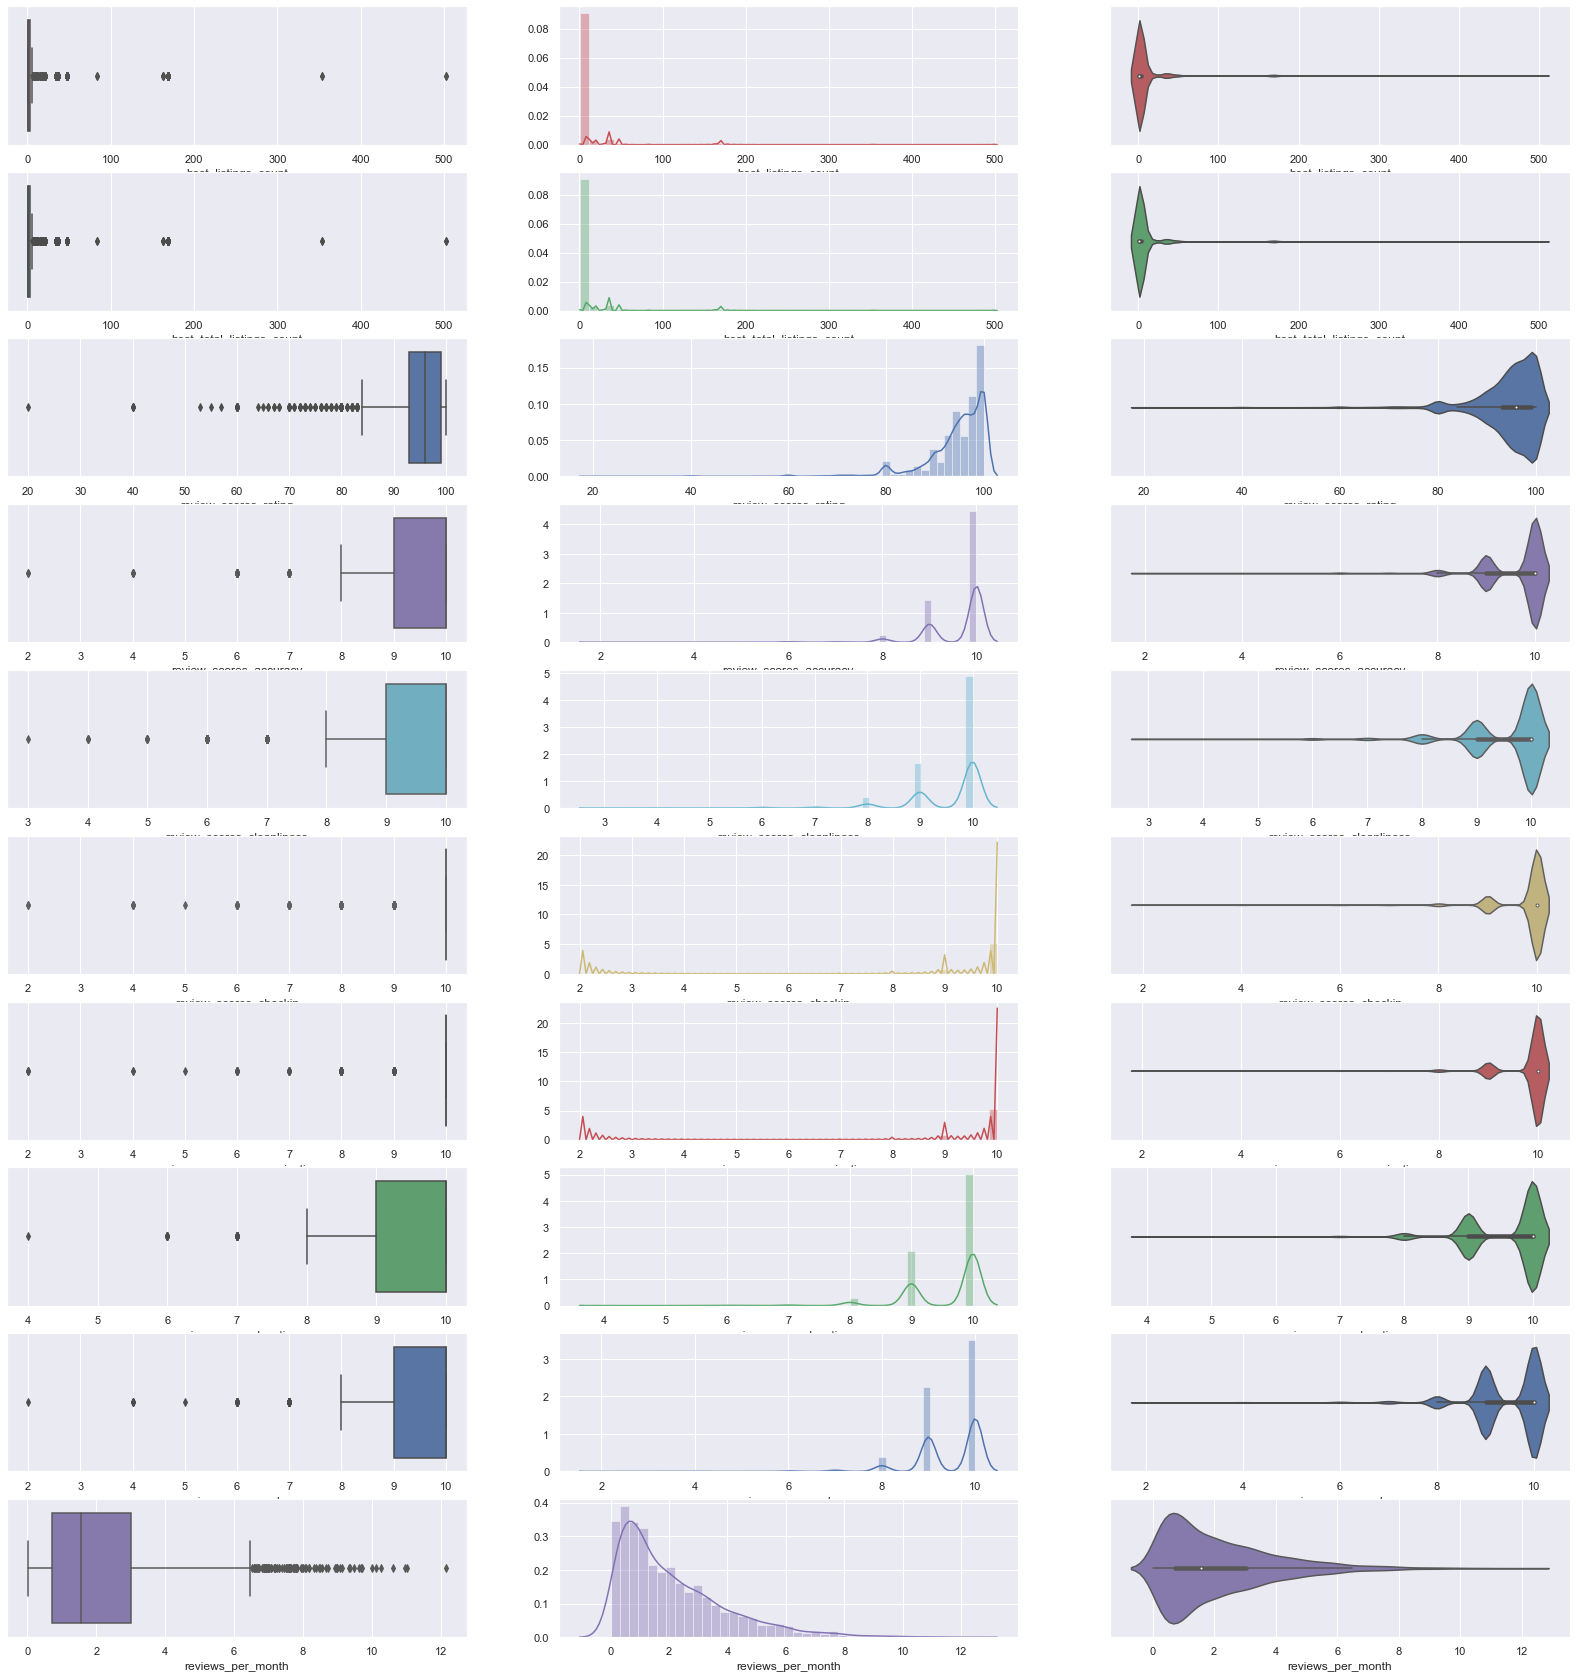

In [10]:
f, axes = plt.subplots(10, 3, figsize=(28, 30))

colors = ["r", "g", "b", "m", "c", "y", "r", "g", "b", "m", "c"]


count=0
for var in numeric1:
    print(var)
    sb.boxplot(numeric1[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numeric1[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numeric1[var], color = colors[count], ax = axes[count,2])
    count += 1

In [11]:
print (numeric1.corr())

                             host_listings_count  host_total_listings_count  \
host_listings_count                     1.000000                   1.000000   
host_total_listings_count               1.000000                   1.000000   
review_scores_rating                   -0.109444                  -0.109444   
review_scores_accuracy                 -0.123206                  -0.123206   
review_scores_cleanliness              -0.043799                  -0.043799   
review_scores_checkin                  -0.190696                  -0.190696   
review_scores_communication            -0.138863                  -0.138863   
review_scores_location                  0.024251                   0.024251   
review_scores_value                    -0.114271                  -0.114271   
reviews_per_month                      -0.118695                  -0.118695   

                             review_scores_rating  review_scores_accuracy  \
host_listings_count                     -0.109444    

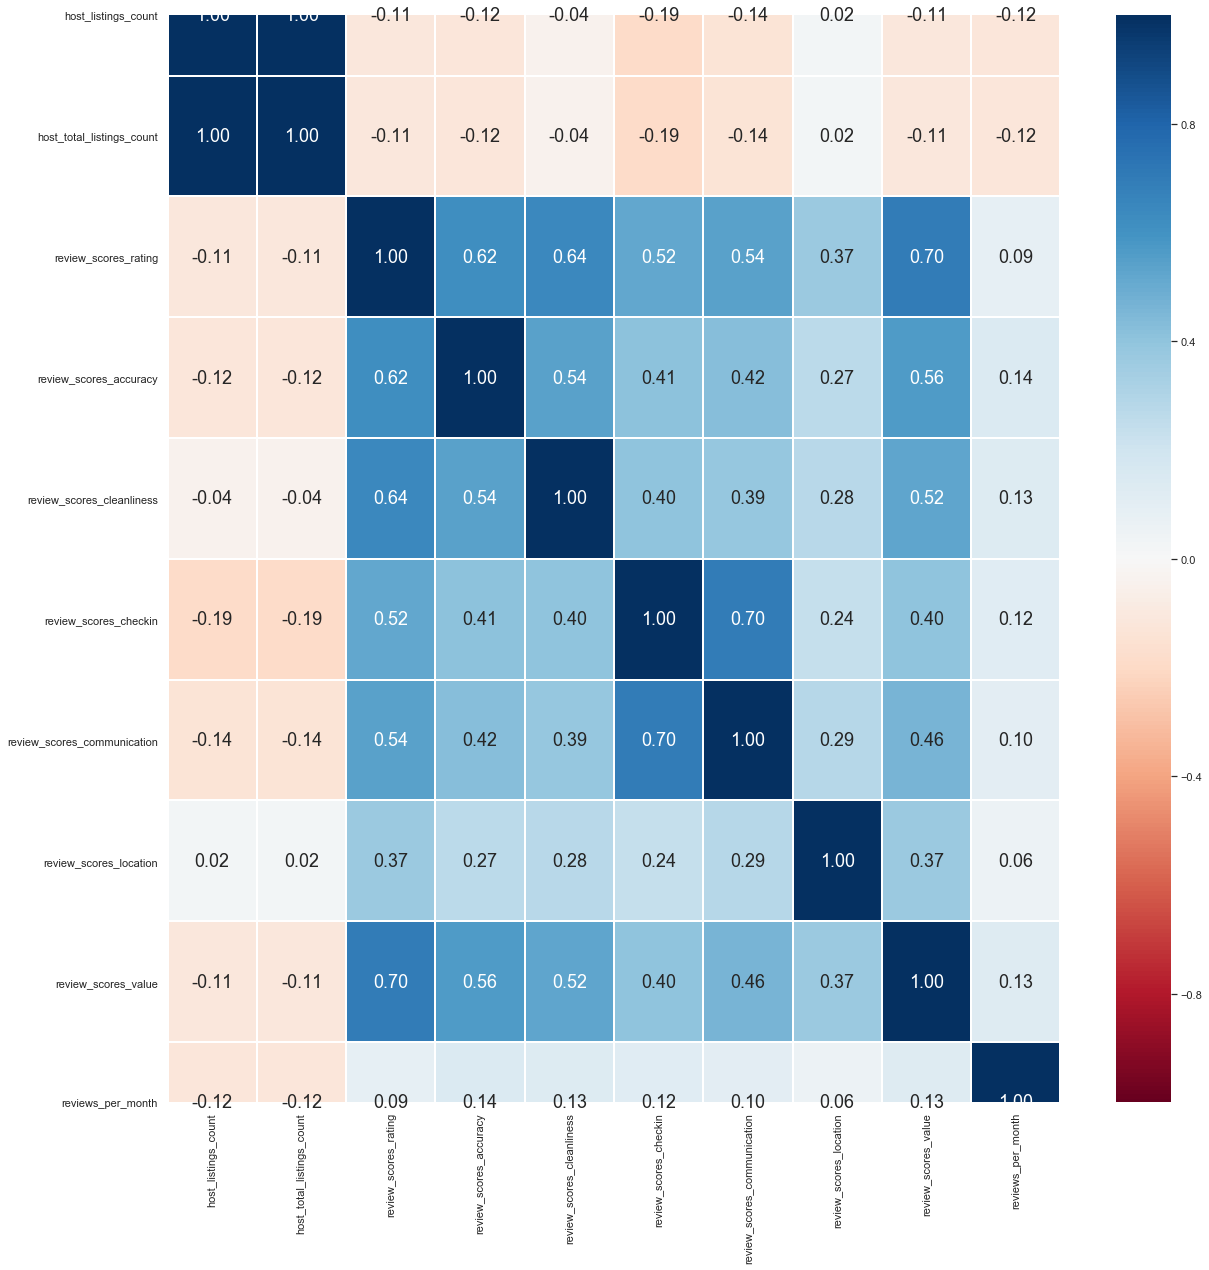

In [12]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(numeric1.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [26]:
names = ["host_listings_count","host_total_listings_count", "review_scores_rating", "review_scores_accuracy", 
         "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", 
         "review_scores_value", "reviews_per_month"]

for i in names: 
    i = pd.DataFrame(numeric1[i])

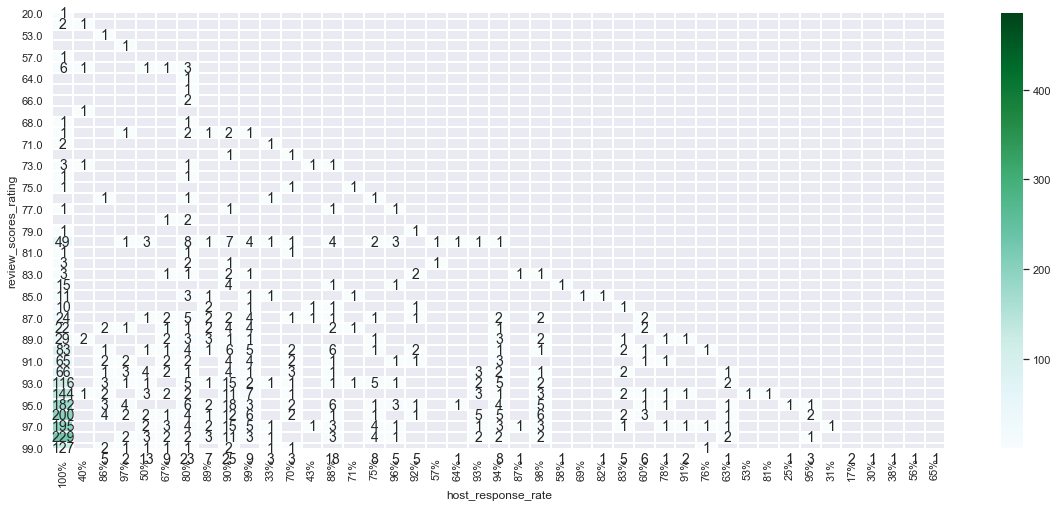

In [29]:
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(data.groupby(["review_scores_rating", "host_response_rate"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn")

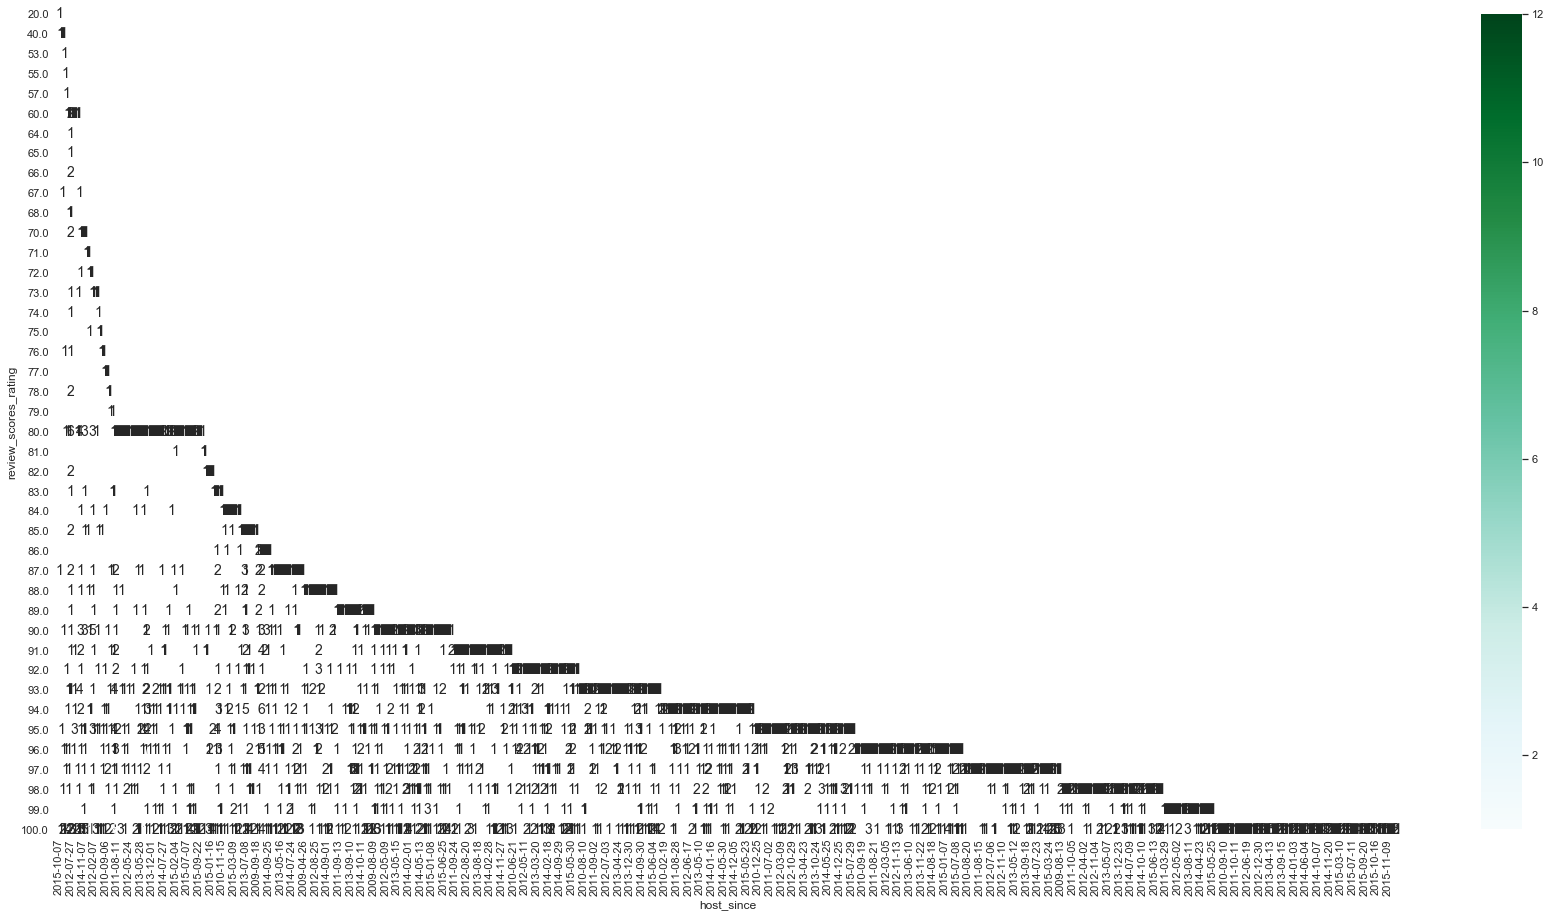

In [32]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.heatmap(data.groupby(["review_scores_rating", "host_since"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn")

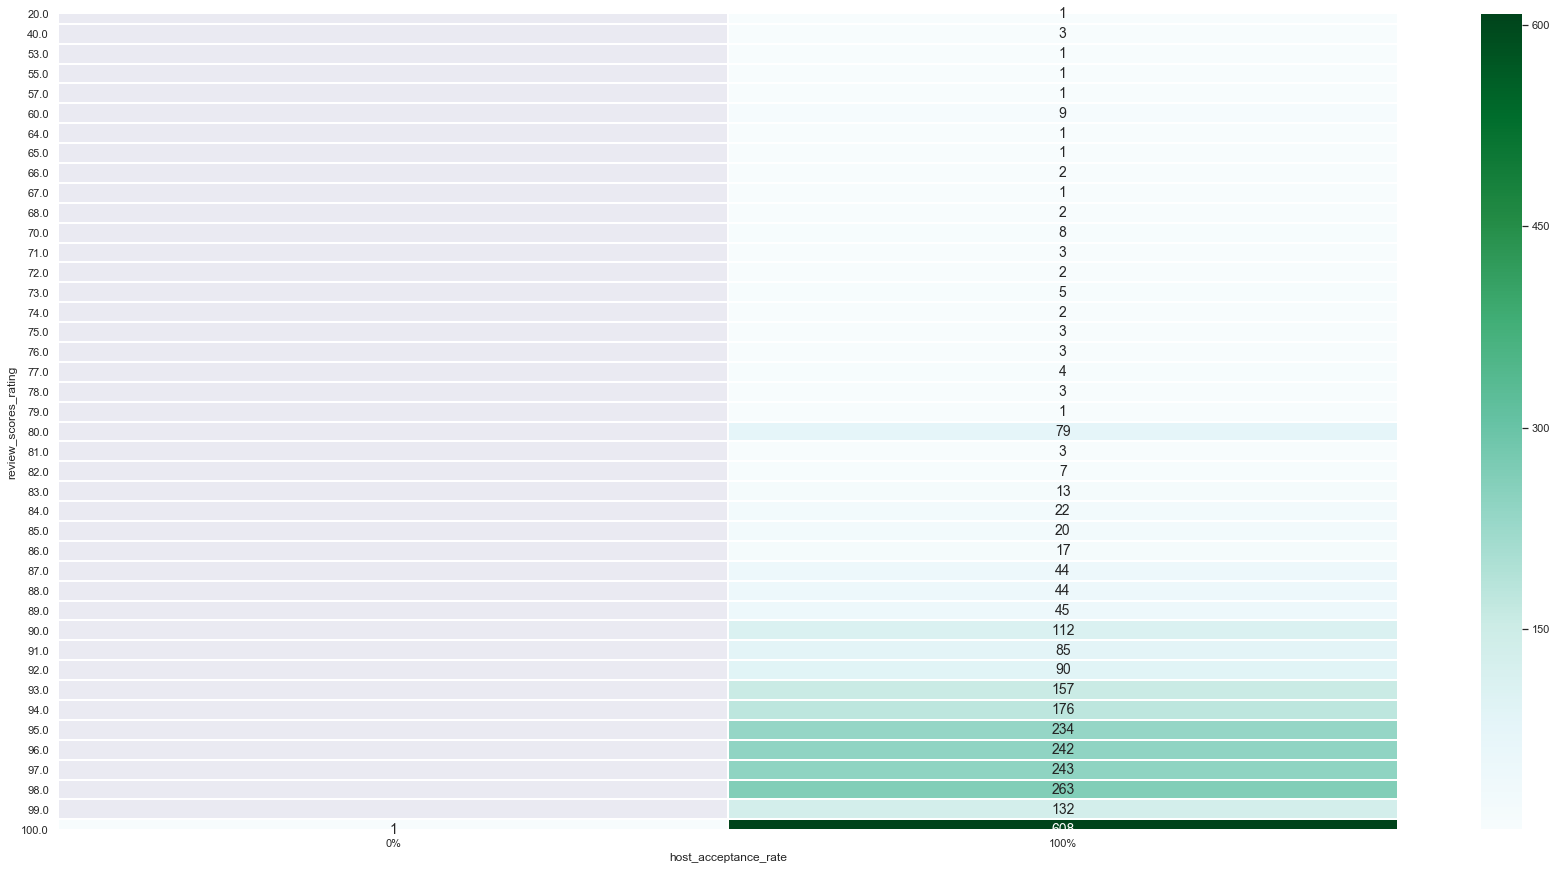

In [33]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.heatmap(data.groupby(["review_scores_rating", "host_acceptance_rate"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn")

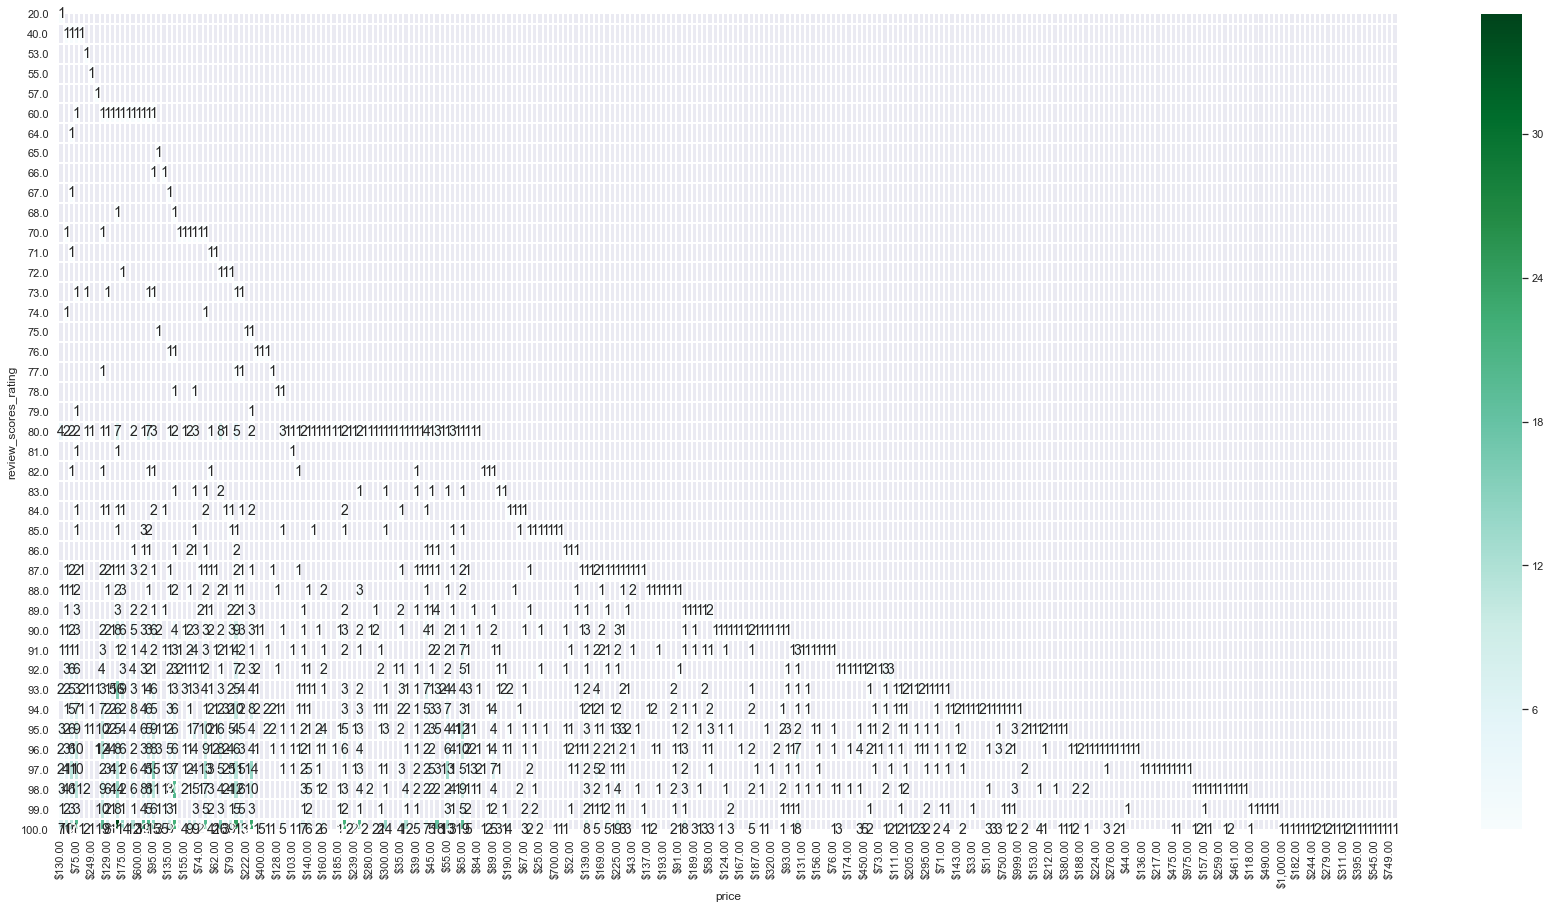

In [36]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.heatmap(data.groupby(["review_scores_rating", "price"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn")

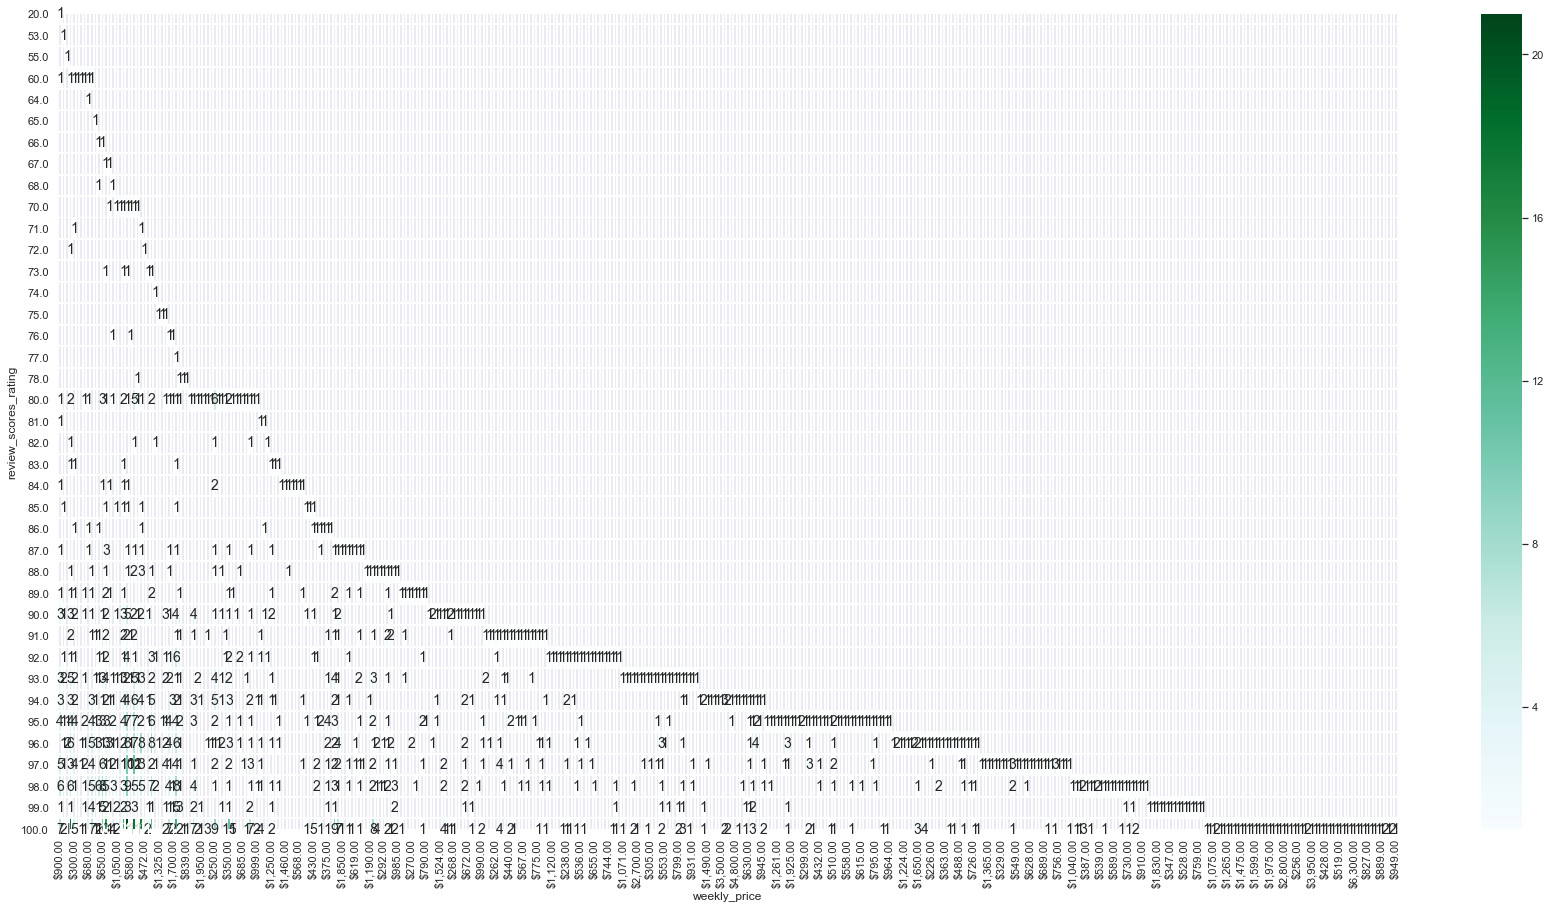

In [37]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.heatmap(data.groupby(["review_scores_rating", "weekly_price"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn")

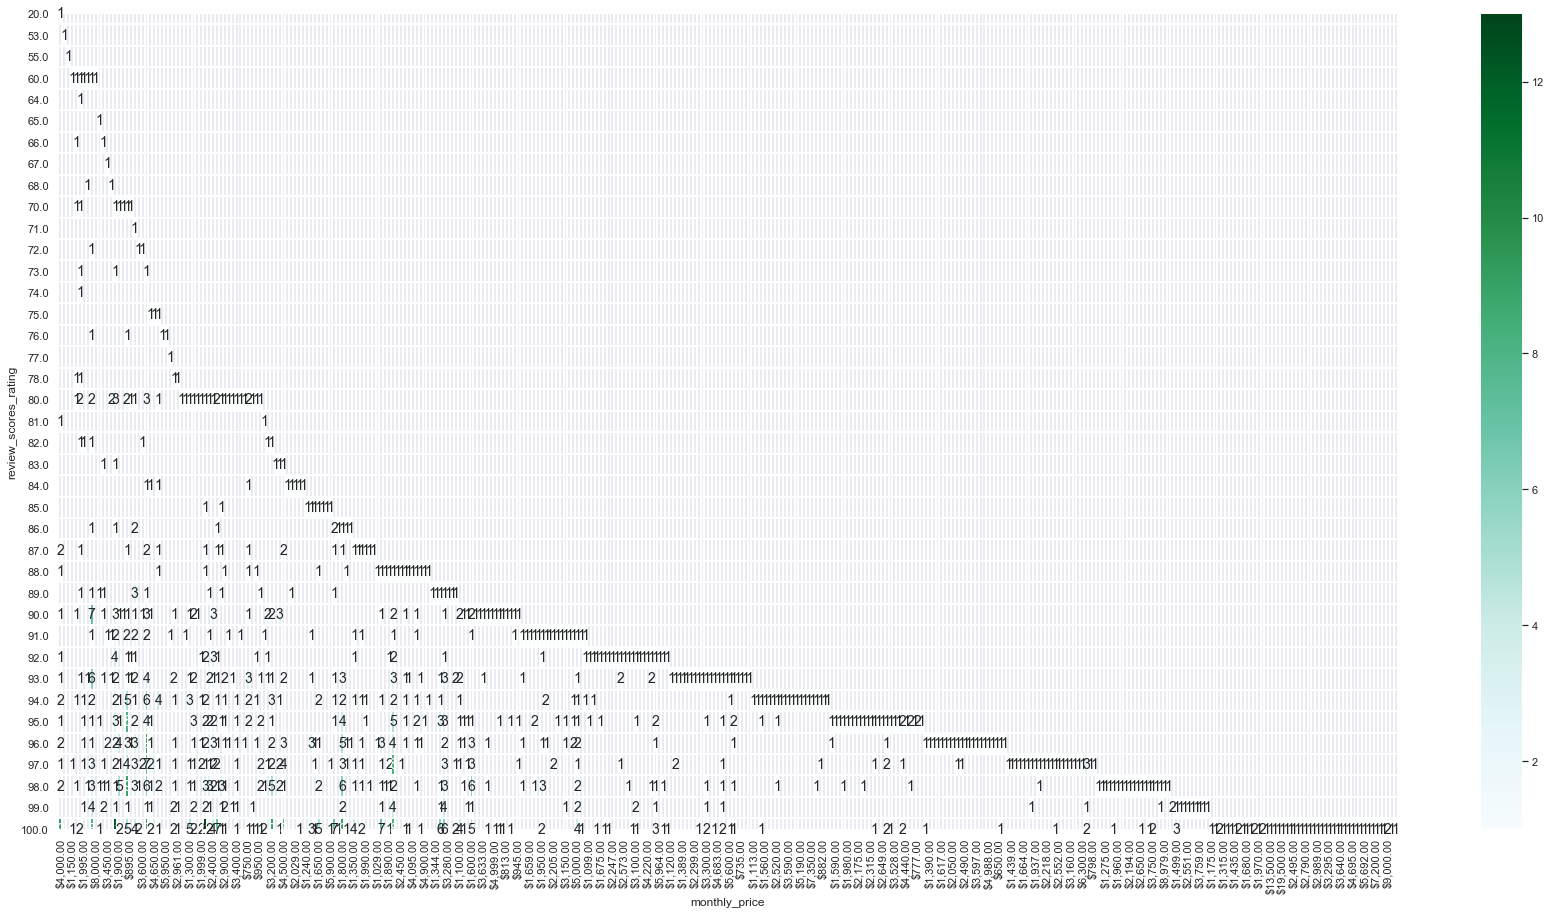

In [38]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.heatmap(data.groupby(["review_scores_rating", "monthly_price"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn")